In [1]:
%matplotlib inline

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, plot_roc_curve, RocCurveDisplay

# Model Training and Improvement

## Live Demos

### Reading and cleaning the data

In [3]:
income_dataset = pd.read_csv('data/adult.csv')

In [4]:
income_dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
X = income_dataset.drop(columns=['income'])

In [7]:
y = income_dataset.income

In [9]:
X

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [8]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [10]:
income_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
income_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [13]:
income_dataset.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
income_dataset.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [18]:
# Transform the object features into integers
X = pd.get_dummies(X, drop_first=True)

In [21]:
X

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [20]:
X.dtypes.unique()

array([dtype('int64'), dtype('uint8')], dtype=object)

### Scaling the data

In [24]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled

array([[0.10958904, 0.14512876, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.28767123, 0.05245126, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.15068493, 0.21964867, 0.73333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.56164384, 0.09446153, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.06849315, 0.12800425, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.47945205, 0.18648211, 0.53333333, ..., 1.        , 0.        ,
        0.        ]])

### Modeling and regularization

In [35]:
logistic_regression = LogisticRegression(C = 1e9, max_iter=1000)
logistic_regression.fit(X_scaled, y)

LogisticRegression(C=1000000000.0, max_iter=1000)

In [36]:
print(logistic_regression.score(X_scaled, y))

0.8535072273862659


In [44]:
for C in [1e-10, 1e-6, 1e-5,0.01, 0.1, 1, 10, 1e3, 1e6,1e9]:
    logistic_regression = LogisticRegression(C = C, max_iter=1000)
    logistic_regression.fit(X_scaled, y)
    print('C=', C, '-> Score:', logistic_regression.score(X_scaled, y), 'Coef ->', np.abs(logistic_regression.coef_[0][42]))

C= 1e-10 -> Score: 0.7607182343065395 Coef -> 9.73255694965195e-08
C= 1e-06 -> Score: 0.7607182343065395 Coef -> 0.0009701959750465449
C= 1e-05 -> Score: 0.7607182343065395 Coef -> 0.009376287621681967
C= 0.01 -> Score: 0.8374964170181401 Coef -> 0.6070798994676682
C= 0.1 -> Score: 0.8451742352893002 Coef -> 0.655092740025231
C= 1 -> Score: 0.8525654150116703 Coef -> 0.611970531794074
C= 10 -> Score: 0.8533639081118709 Coef -> 0.6011259083842538
C= 1000.0 -> Score: 0.8535277015683224 Coef -> 0.5998609573785757
C= 1000000.0 -> Score: 0.8535481757503788 Coef -> 0.597562028209817
C= 1000000000.0 -> Score: 0.8535072273862659 Coef -> 0.6010578196003252


The results indicate that these models have high bias, not high variance. Also, with an increase in regularization, the coefficients approach zero.

In [42]:
y.value_counts() / len(y)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

### Splitting the data

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42, stratify = y)

In [72]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36631, 100), (36631,), (12211, 100), (12211,))

### Logistic regression

In [118]:
logistic_regression = LogisticRegression(C = 0.001, max_iter=1000)
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=1000)

In [119]:
logistic_regression.score(X_train,y_train)

0.8193060522508258

In [120]:
logistic_regression.score(X_test, y_test)

0.821390549504545

In [121]:
y_train.value_counts(), (y_train.value_counts() / len(y_train))

(<=50K    27866
 >50K      8765
 Name: income, dtype: int64,
 <=50K    0.760722
 >50K     0.239278
 Name: income, dtype: float64)

In [122]:
y_test.value_counts(), (y_test.value_counts() / len(y_test))

(<=50K    9289
 >50K     2922
 Name: income, dtype: int64,
 <=50K    0.760708
 >50K     0.239292
 Name: income, dtype: float64)

In [123]:
print(classification_report(y_test, logistic_regression.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

       <=50K       0.82      0.97      0.89      9289
        >50K       0.79      0.34      0.48      2922

    accuracy                           0.82     12211
   macro avg       0.81      0.66      0.69     12211
weighted avg       0.82      0.82      0.79     12211



A high Precision percentage and a low Recall percentage mean that we are missing a significant portion of the target variable.

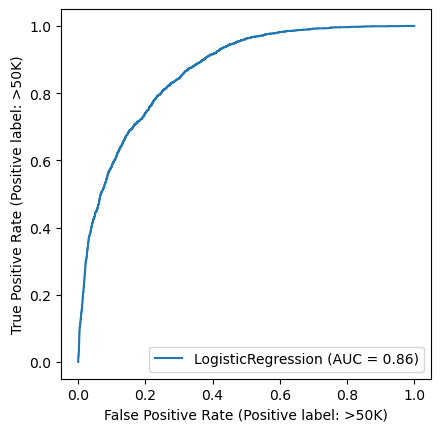

In [124]:
# Plot ROC curve
RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test)
plt.gca().set_aspect('equal')
plt.show()

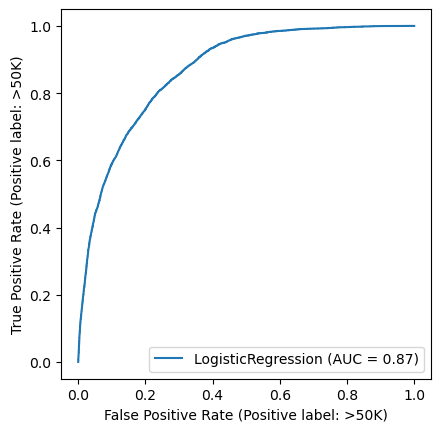

In [125]:
# Plot ROC curve for the train dataset
RocCurveDisplay.from_estimator(logistic_regression, X_train, y_train)
plt.gca().set_aspect('equal')
plt.show()

ROC curve plots for the training and test sets yield almost the same result, providing no certainty about whether the model is overfitting or underfitting.

### Grid Search

In [131]:
grid_search = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'fit_intercept': [True, False],
        'max_iter': [10, 100, 200, 250]
    },
    scoring = 'f1'
)

In [132]:
grid_search.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", li

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False],
                         'max_iter': [10, 100, 200, 250]},
             scoring='f1')

In [135]:
grid_search.best_params_

{'C': 0.001, 'fit_intercept': True, 'max_iter': 10}

In [141]:
grid_search.best_score_

nan

### Randomized Search CV

In [137]:
randomized_search = RandomizedSearchCV(
    estimator = LogisticRegression(),
    param_distributions = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'fit_intercept': [True, False],
        'max_iter': [10, 100, 200, 250]
    },
    n_iter = 5
)

In [138]:
randomized_search.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'fit_intercept': [True, False],
                                        'max_iter': [10, 100, 200, 250]})

In [139]:
randomized_search.best_params_

{'max_iter': 250, 'fit_intercept': True, 'C': 100}

In [140]:
randomized_search.best_score_

0.8522561607726068

In [143]:
randomized_search.cv_results_

{'mean_fit_time': array([0.11380348, 0.12600369, 0.47260189, 1.33319693, 0.1190032 ]),
 'std_fit_time': array([0.00962399, 0.00831965, 0.03597912, 0.02458607, 0.00709767]),
 'mean_score_time': array([0.01599474, 0.01579642, 0.01679792, 0.01700029, 0.01739545]),
 'std_score_time': array([0.00260854, 0.00248312, 0.00160174, 0.00219136, 0.00135485]),
 'param_max_iter': masked_array(data=[10, 10, 100, 250, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_fit_intercept': masked_array(data=[False, True, True, True, True],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[0.1, 1, 0.1, 100, 0.01],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_iter': 10, 'fit_intercept': False, 'C': 0.1},
  {'max_iter': 10, 'fit_intercept': True, 'C': 1},
  {'max_iter': 100,

The models in general do not have high bias - mean_test_score = 0.83.. - and do not have high variance - std_test_score = 0.00....